## **Importing Libraries**


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Inserting the data

In [68]:
train = pd.read_csv('train.csv')

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Begins with EDA
1) Analysing the Missing Data

In [70]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking null values in the data set

In [73]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

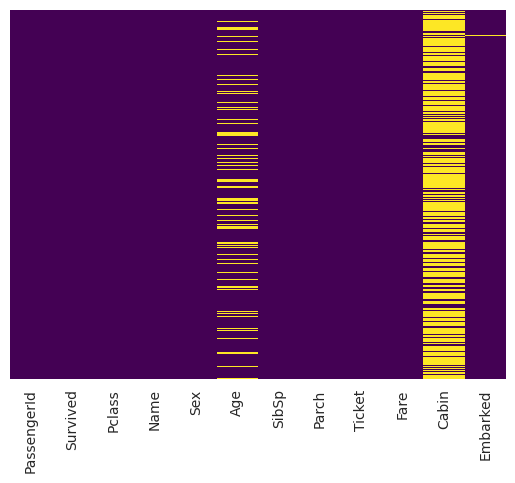

In [74]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

**Interpretation:**as we can see age data simply 20% are missing and cabin data in cabin are missing at larger level so we will remove it as we dont rerquired it ,
Now we will plot some graphs to analyse the data

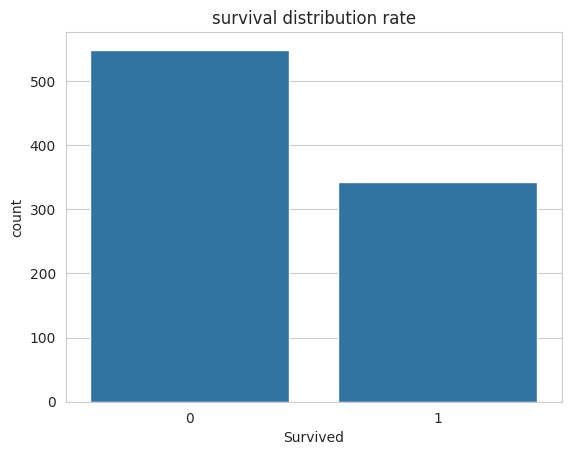

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.title ('survival distribution rate')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

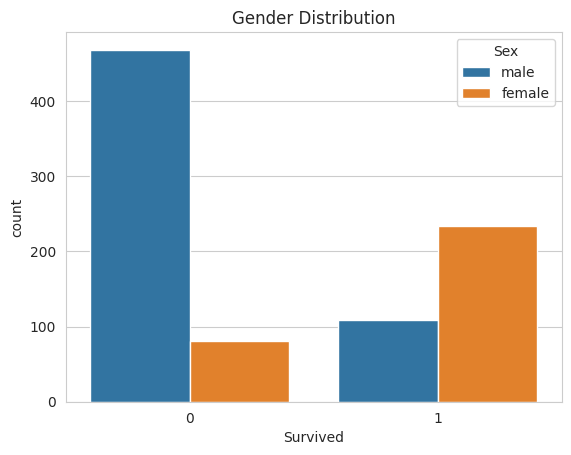

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' ,hue='Sex' ,data=train)
plt.title ('Gender Distribution')

Interpretation: survival rate of male and female , o=not survived, 1= survived

Text(0.5, 1.0, 'Classwise Distribution')

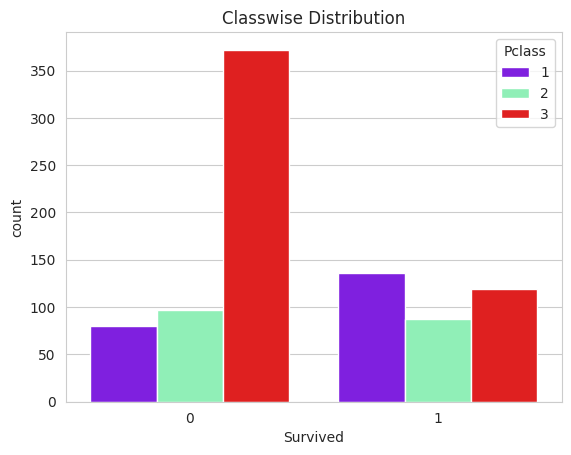

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' ,hue= 'Pclass' , data=train, palette='rainbow')
plt.title ('Classwise Distribution')

In [78]:
pd.crosstab(train.Pclass, train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


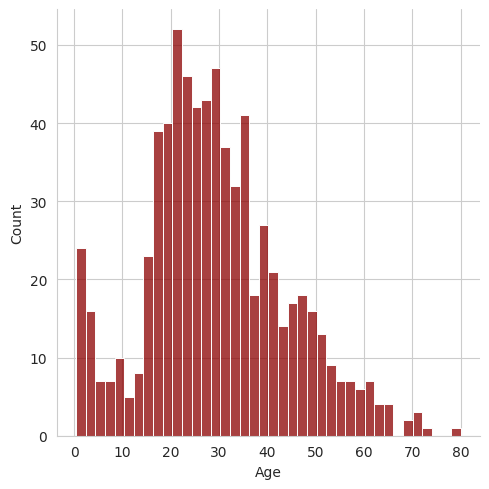

In [79]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

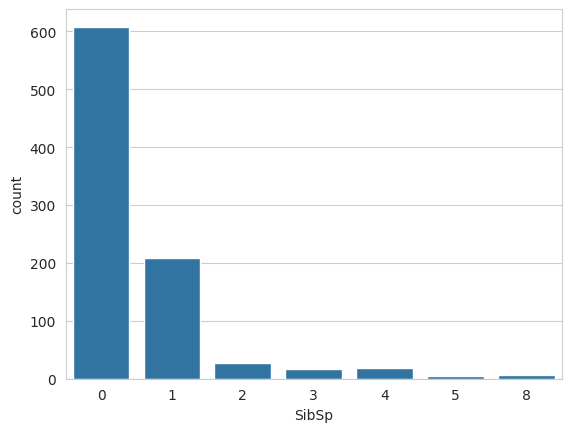

In [80]:
sns.countplot(x='SibSp',data=train)

The above crosstab indicates 2 things:

Most of the passerenges didn't had siblings onboard and the majority had atmost 1 sibling onboard

Not much of priority was given to the passengers who had sibelings onboard in the rescue operation

we prepare histogram on parameter fare means

In [97]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000


The above correlation table indicated below features:

The Age was not a priority in the rescue operation similat to the sibelings and parents column as correlation with the target variable is very low
There should have been a higher correlation between the Fare and Pclass

In [98]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


<Axes: >

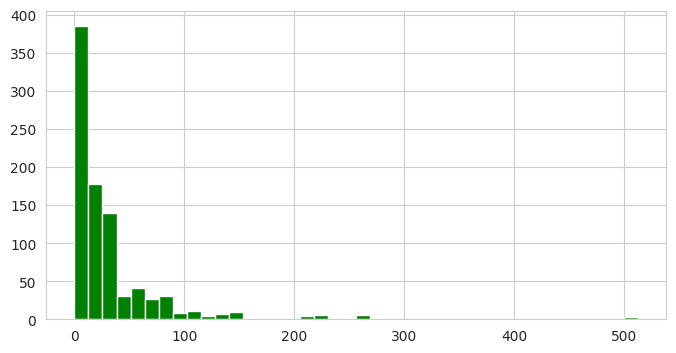

In [81]:
train['Fare'].hist(color='green', bins=40,figsize=(8,4))

I am using **Cufflinlks** for ploting interactive graphs

In [82]:
import cufflinks as cf
cf.go_offline()

In [83]:
import pandas as pd
import cufflinks as cf
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
import numpy as np

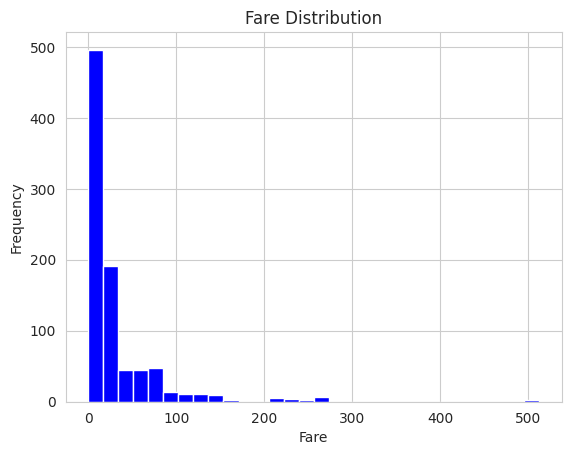

In [84]:
train['Fare'].plot(kind='hist', bins=30, color='blue', title='Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

**DATA Cleaning**
We are adding missing values to age data rows checking the averagr age and filling it into misisng data

<ipython-input-85-551bc5ec5847>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

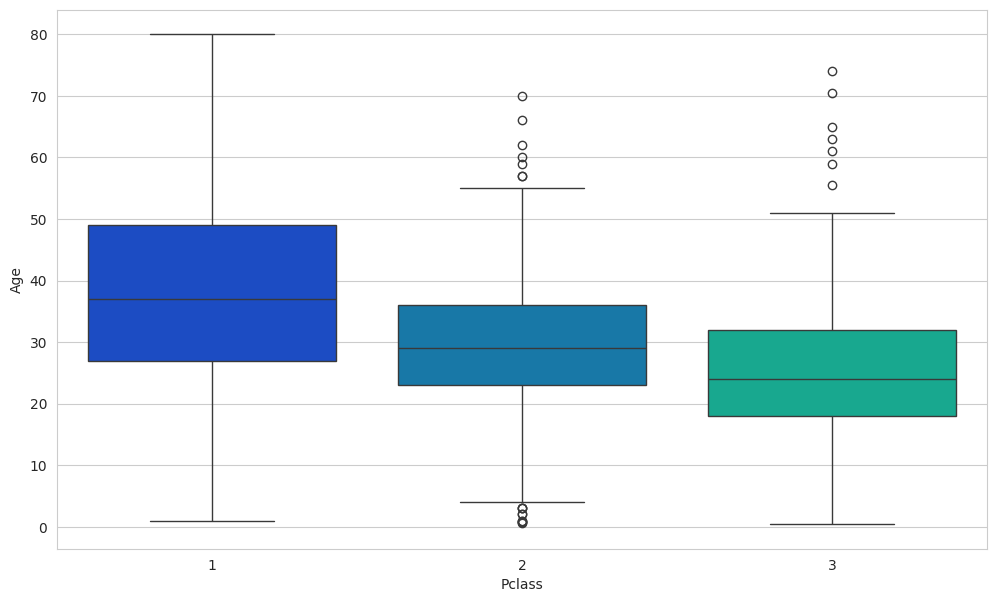

In [85]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

we can see rich passengers are in first class , we will impute average value based on plcass for age data rows

In [86]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [87]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

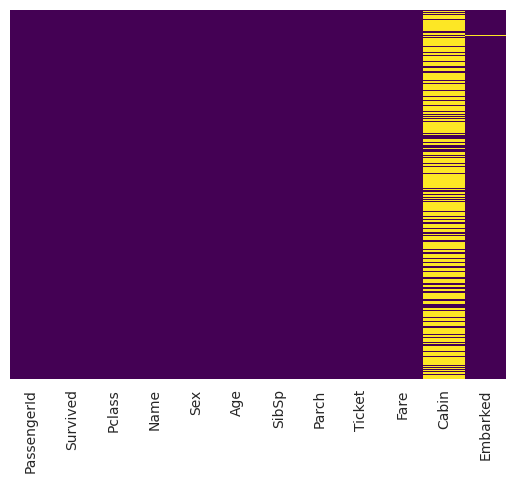

In [88]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Droped Cabin Coloumn below

In [89]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

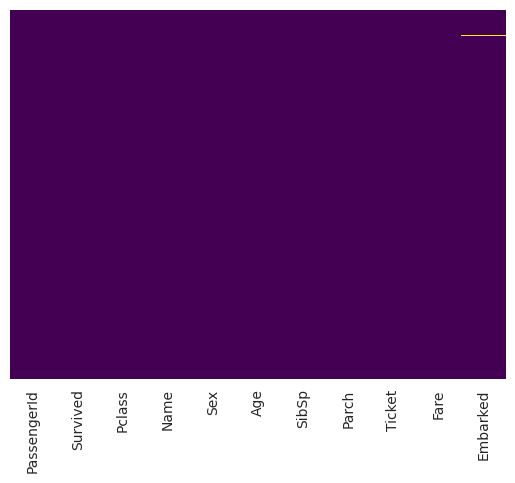

In [90]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Converting Categorical Features**
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [92]:
pd.get_dummies(train['Embarked'], drop_first=True).head()


,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [93]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [94]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [95]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


# **Insights of above EDA:**

1. Passenger Class (Pclass) Significantly Influenced Survival Rates
Conclusion: There was a strong correlation between passenger class and survival. Passengers in the first class had a significantly higher survival rate compared to those in the second and third classes.

 **Interpretation:** This indicates that socio-economic status played a critical role in survival, with wealthier passengers having better access to lifeboats and safety measures.

2. Gender Was a Key Determinant of Survival
Conclusion: Females had a much higher survival rate than males, reflecting the "women and children first" protocol followed during the evacuation.

 **Interpretation:** The prioritization of women for lifeboats resulted in a substantial gender disparity in survival rates.
3. Age Played a Critical Role in Survival, Particularly for Children
Conclusion: Children had a higher likelihood of survival compared to adults, especially those in the lower age brackets.

 **Interpretation:** The focus on saving children along with women during the evacuation led to better survival outcomes for younger passengers.

Family Size and Companionship: Passengers traveling alone had lower survival rates compared to those with family members. This suggests that having companions might have provided additional support during the crisis.
Embarkation Point: Passengers who embarked from different ports showed varying survival rates, possibly reflecting differences in passenger demographics and access to lifeboats.